This note book has all the results shown in the paper, but won't run without generating all the traiend models.

In [4]:
%load_ext autoreload
%autoreload 2

In [611]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import OrderedDict
from models.VAEs import AutoEncoder
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import make_grid

Dz = 100
Dh = 512
device = torch.device("cuda:0")
bs = 200

M = 1
sm_noise_std= 0.1
paired_colors = plt.get_cmap("Paired").colors

colors = [paired_colors[1],paired_colors[3],paired_colors[5],paired_colors[2],paired_colors[4],paired_colors[6],
         "k"]
labels=[r"$\mathcal{L}_1$+FD",
        r"$\mathcal{L}_2$+FD",
        r"$\mathcal{L}_3$+FD",
        r"$\mathcal{L}_1$+KLD",
        r"$\mathcal{L}_2$+KLD",
        r"$\mathcal{L}_3$+KLD",
        "KLD (ELBO)"]

model_conditions = [
        [1,0,"f"],
        [3,0,"f"], #v3 is L2 in the paper
        [2,0,"f"],
        [1,0,"kl-f"],
        [3,0,"kl-f"],
        [2,0,"kl-f"],
        [1,0,"kl"]
        ]

Text(0.5, 1.0, 'post. Fisher divergence')

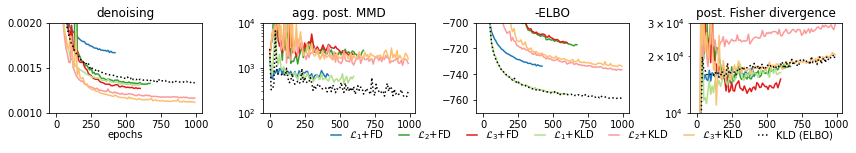

In [623]:
# from gen_run_ae import all_conditions
condition_names = ["dataset", "score_v", "denoise_ae", "objective", "M", "K", "seed"]
import os

fig, axes = plt.subplots(1,4,figsize=(12,2), sharex=True)
axes = axes.reshape(1,-1)

hists = []

for di, dataset in enumerate(["mnist"]):
    
    datasets=[[dataset]]
    Ms = [[5,1]]
    seeds = [[3]]

    all_conditions = [list(chain(*e)) for e in list(product(datasets, model_conditions, Ms, seeds))]

    for ci, c in enumerate(all_conditions):
        d = dict(zip(condition_names, c))
        globals().update(d)
        if denoise_ae==1:
            continue
        nc = 3 if dataset == "cifar" else 1

        filename = f"{dataset}_smn{sm_noise_std}_sv{score_v}_dae{denoise_ae}_obj{objective}_M{M}_K{K}_s{seed:02d}"

        file_dir = f"results/ae/ckpts/{filename}"
        if not os.path.exists(file_dir):
            print(file_dir)
            continue
    #     model = AutoEncoder(Dz, Dh, Dx, nc = nc, fit_sigma=True, M = M).to(device=device)
        hists += torch.load(file_dir)[-1],

        summary = np.loadtxt(f"results/ae/summary/{filename}", delimiter=',')
        summary = np.atleast_2d(summary)

        for i in range(4):
            ax = axes[di,i]
            start = 0
            end = summary.shape[0]
            interval = 10
            ax.plot(np.arange(start, end, interval),
                    summary[start:end:interval,i], label=labels[ci], alpha=1, color = colors[ci], ls=":" if objective == "kl" else "-")
            if i in [1,3]:
                ax.set_yscale("log")
    #         ax.set_xscale("log")
    #         ax.set_xticks([0,end-start])
    #         ax.set_xticklabels([800,1000])
    
    if dataset == "mnist":
        axes[di,0].set_ylim(1e-3,2e-3)
        axes[di,1].set_ylim(1e2,1e4)
        axes[di,2].set_ylim(-770,-700)
        axes[di,3].set_ylim(1e4,3e4)
        axes[di,0].set_yticks([1e-3,1.5e-3,2e-3])
    
    if dataset == "fashion":
        axes[di,0].set_ylim(3e-3,4e-3)
        axes[di,1].set_ylim(1e2,1e5)
        axes[di,2].set_ylim(-680,-600)
        axes[di,3].set_ylim(1e3,3e4)
        axes[di,0].set_yticks([3e-3,4e-3])
    if dataset == "cifar":
        pass
        axes[di,0].set_ylim(5.3e-3,6.3e-3)
        axes[di,1].set_ylim(50,1e3)
        axes[di,2].set_ylim(-1900,-1800)
        axes[di,3].set_ylim(1e3,5e5)
        axes[di,0].set_yticks(axes[di,0].get_ylim())

axes[di,0].set_xlabel("epochs", labelpad=-0.5)
fig.tight_layout()
axes[-1,-1].legend(ncol=7, handlelength=1, columnspacing=1.5, loc="upper right", bbox_to_anchor=[1,-0.07], frameon=False)
axes[0,0].set_title("denoising")
axes[0,1].set_title("agg. post. MMD")
axes[0,2].set_title("-ELBO")
axes[0,3].set_title("post. Fisher divergence")
# axes[0,0].set_ylabel("CIFAR")
# axes[1,0].set_ylabel("Fashion")
# fig.savefig(f"figs/traces_ae.pdf", bbox_inches='tight', pad_inches=0.1)

In [527]:
# from gen_run_ae import all_conditions
condition_names = ["dataset", "score_v", "denoise_ae", "objective", "M", "K", "seed"]
import os

all_summary = np.zeros((3,3,7,4))
for di, (dataset) in enumerate(["mnist", "fashion","cifar"]):
    
    for seed in range(3):
    
        datasets=[[dataset]]
        Ms = [[5,5 if dataset=="cifar" else 1]]
        seeds = [[seed]]

        all_conditions = [list(chain(*e)) for e in list(product(datasets, model_conditions, Ms, seeds))]

        for ci, c in enumerate(all_conditions):
            d = dict(zip(condition_names, c))
            globals().update(d)
            if denoise_ae==1:
                continue
            nc = 3 if dataset == "cifar" else 1

            filename = f"{dataset}_smn{sm_noise_std}_sv{score_v}_dae{denoise_ae}_obj{objective}_M{M}_K{K}_s{seed:02d}"

            file_dir = f"results/ae/ckpts/{filename}"
            if not os.path.exists(file_dir):
                print(file_dir)
                continue
        #     model = AutoEncoder(Dz, Dh, Dx, nc = nc, fit_sigma=True, M = M).to(device=device)
            hists += torch.load(file_dir)[-1],

            summary = np.loadtxt(f"results/ae/summary/{filename}", delimiter=',')
            all_summary[di,seed,ci] = summary[-1,:4]


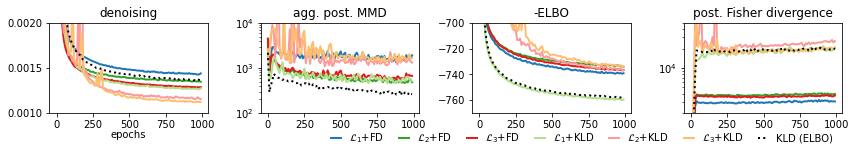

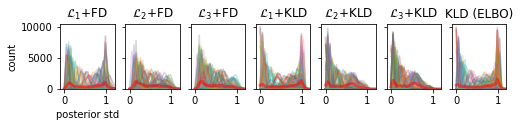

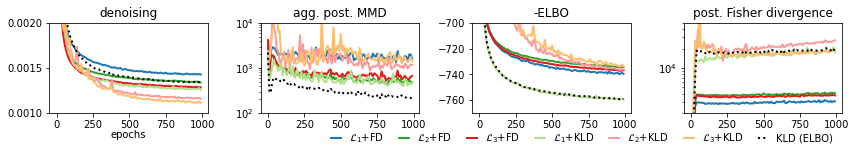

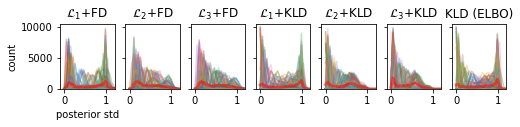

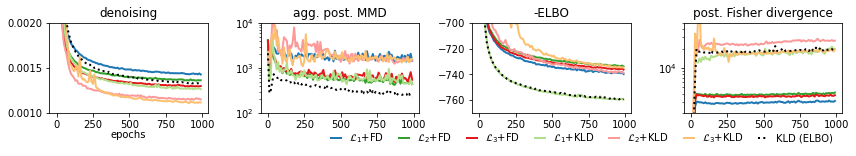

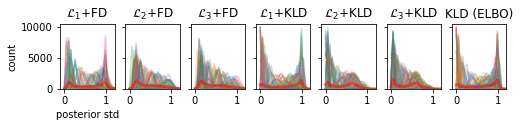

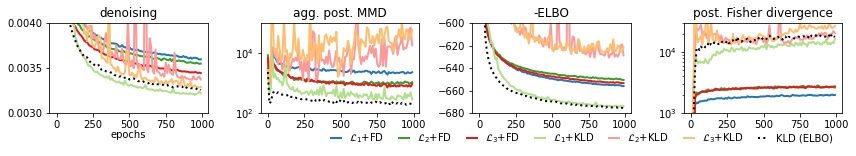

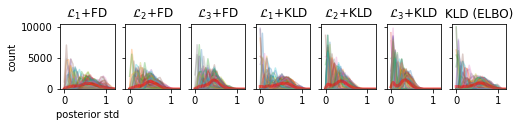

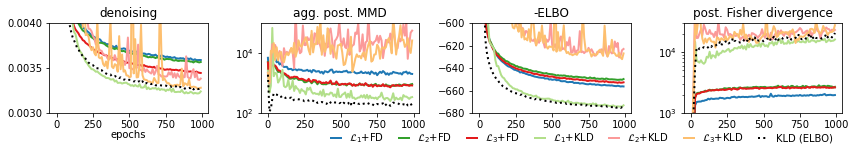

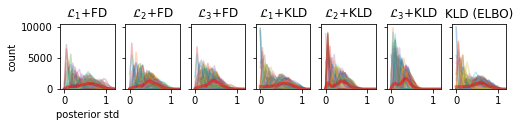

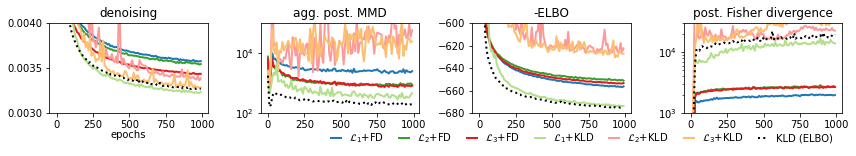

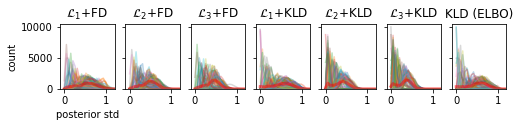

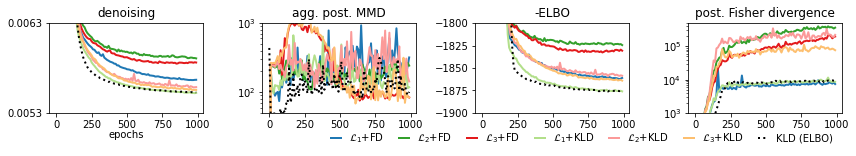

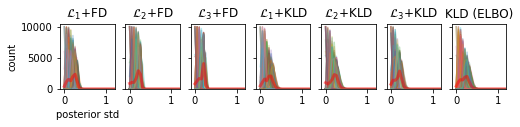

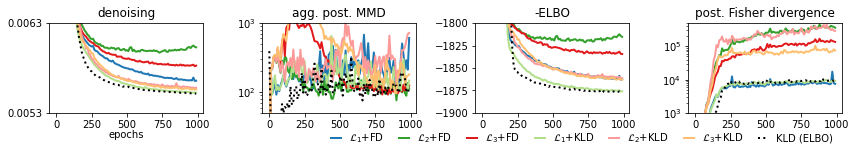

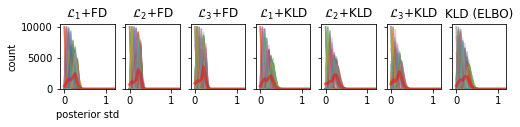

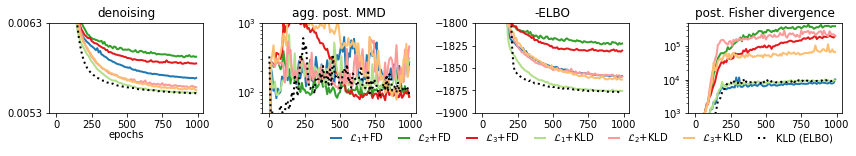

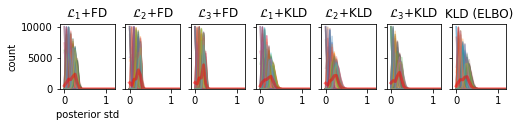

In [613]:
from itertools import chain, product

for dn, sd in product(["mnist", "fashion", "cifar"], range(0,3)):
    
    datasets=[[dn]]

    Ms = [[5,5 if dn == "cifar" else 1]]
    seeds = [[sd]]

    all_conditions = [list(chain(*e)) for e in list(product(datasets, model_conditions, Ms, seeds))]


    # from gen_run_ae import all_conditions
    condition_names = ["dataset", "score_v", "denoise_ae", "objective", "M", "K", "seed"]
    import os

    fig, axes = plt.subplots(1,4,figsize=(12,2))
    axes = axes.reshape(-1)

    hists = []

    for ci, c in enumerate(all_conditions):
        d = dict(zip(condition_names, c))
        globals().update(d)
        if denoise_ae==1:
            continue
        nc = 3 if dataset == "cifar" else 1

        filename = f"{dataset}_smn{sm_noise_std}_sv{score_v}_dae{denoise_ae}_obj{objective}_M{M}_K{K}_s{seed:02d}"

        file_dir = f"results/ae/ckpts/{filename}"
        if not os.path.exists(file_dir):
            print(file_dir)
            continue
    #     model = AutoEncoder(Dz, Dh, Dx, nc = nc, fit_sigma=True, M = M).to(device=device)
        hists += torch.load(file_dir)[-1],

        summary = np.loadtxt(f"results/ae/summary/{filename}", delimiter=',')

#         print(summary.shape)
        for i in range(4):
            ax = axes[i]
            start = 0
            end = summary.shape[0]
            interval = 10
            ax.plot(np.arange(start, end, interval),
                    summary[start:end:interval,i], label=labels[ci], alpha=1, color = colors[ci], lw=2,
                   ls=":" if objective == "kl" else "-")
            if i in [1,3]:
                ax.set_yscale("log")
    #         ax.set_xscale("log")
    #         ax.set_xticks([0,end-start])
    #         ax.set_xticklabels([800,1000])
    axes[0].set_xlabel("epochs", labelpad=-0.5)

    if dataset == "mnist":
        axes[0].set_ylim(1e-3,2e-3)
        axes[1].set_ylim(1e2,1e4)
        axes[2].set_ylim(-770,-700)
        axes[3].set_ylim(2e3,5e4)
        axes[0].set_yticks([1e-3,1.5e-3,2e-3])

    if dataset == "fashion":
        axes[0].set_ylim(3e-3,4e-3)
        axes[1].set_ylim(1e2,1e5)
        axes[2].set_ylim(-680,-600)
        axes[3].set_ylim(1e3,3e4)
        axes[0].set_yticks([3e-3, 3.5e-3,4e-3])
        
    if dataset == "cifar":
        axes[0].set_ylim(5.3e-3,6.3e-3)
        axes[1].set_ylim(50,1e3)
        axes[2].set_ylim(-1900,-1800)
        axes[3].set_ylim(1e3,5e5)
        axes[0].set_yticks(axes[0].get_ylim())
        
    fig.tight_layout()
    axes[-1].legend(ncol=7, handlelength=1, columnspacing=1.5, loc="upper right", bbox_to_anchor=[1,-0.1], frameon=False)
    axes[0].set_title("denoising")
    axes[1].set_title("agg. post. MMD")
    axes[2].set_title("-ELBO")
    axes[3].set_title("post. Fisher divergence")

    fig.savefig(f"figs/{dataset}_ae_{seed}.jpeg", bbox_inches='tight', pad_inches=0.1, dpi=100)
    
    
    fig, axes = plt.subplots(1,7, figsize=(8,1.2), sharex=True, sharey=True)
    for i in range(7):
        ax = axes[i]
        ax.plot(np.linspace(0,1.5,30),hists[i][-1].T, alpha=0.3);
        ax.plot(np.linspace(0,1.5,30),hists[i][-1].mean(0), alpha=0.5, c="red", lw=3);
        ax.set_title(labels[i])

    ax.set_xlim([-0.1,1.2])
    ax = axes[0]
    ax.set_ylabel("count")
    ax.set_xlabel("posterior std")
    ax.set_ylim([0,10500])

    fig.savefig(f"figs/{dataset}_sparse_{seed}.jpeg", bbox_inches="tight", pad_inches=0.1,dpi=100)

In [392]:
def get_dataset(name, partition="test", bs=200, num_worker=2):
    
    if name == "mnist":
        

        dataset = torchvision.datasets.MNIST(root='../data', train=partition=="train", 
                                                  transform=torchvision.transforms.Compose([
                                                                       torchvision.transforms.Pad(2), 
                                                                        transforms.ToTensor(),]), download=True)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=num_worker)
        nc = 1
    
    elif name == "fashion":
        

        dataset = torchvision.datasets.FashionMNIST(root='../data', train=partition=="train", 
                                                         transform=torchvision.transforms.Compose([
                                                                       torchvision.transforms.Pad(2), 
                                                                        transforms.ToTensor(),]), download=True)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=num_worker)
        nc = 1
        
        
    elif name == "cifar":
        
        dataset = torchvision.datasets.CIFAR10(root='../data', train=partition=="train", 
                                                         transform=torchvision.transforms.Compose([
                                                                       torchvision.transforms.Pad(0), 
                                                                        transforms.ToTensor(),]), download=True)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=num_worker)
        nc = 3
        
    return nc, dataset, data_loader

In [ ]:
def tensor_to_image(x):
    x = x[:25]
    x = np.transpose(make_grid(x.reshape(x.shape[0],nc,32,32), nrow=5).cpu().detach().numpy(), [1,2,0])
    return x

K_weights = [1,1,1,2,5,90] + [100]*9
nbatch = len(K_weights)

for ds, sd in tqdm.tqdm(list(product(["mnist","fashion","cifar"], np.arange(3)))):
    
    datasets=[[ds]]
    Ms = [[5,5 if ds=="cifar" else 1]]
    seeds = [[sd]]
    
    nc, test_dataset, test_data_loader = get_dataset(ds)
    model = AutoEncoder(Dz, Dh, Dx, nc = nc, fit_sigma=True, M = M).to(device=device)
    
    
    Dx = 32*32*nc

    all_conditions = [list(chain(*e)) for e in list(product(datasets, model_conditions, Ms, seeds))]

    all_iwelbo = torch.zeros(len(all_conditions), len(test_dataset), nbatch, device=device)


    for ci, c in enumerate(tqdm.tqdm(all_conditions, leave=False)):
        d = dict(zip(condition_names, c))
        globals().update(d)


        filename = f"{dataset}_smn{sm_noise_std}_sv{score_v}_dae{denoise_ae}_obj{objective}_M{M}_K{K}_s{seed:02d}"
        model.load_state_dict(torch.load(f"results/ae/ckpts/"+filename)[0])

    #     z = model.prior.sample([100])
        for data_bi, (clean_x, _) in enumerate((test_data_loader)):
            clean_x = clean_x.to(device).view(bs,-1)
            x = clean_x + torch.randn_like(clean_x) * 0.1
            with torch.no_grad():
                for sample_bi in range(nbatch):
                    z = model.encode(x).sample([K_weights[sample_bi]])
                    q = model.encode(x).log_prob(z)
                    p = model.decode(z).log_prob(x) + model.prior.log_prob(z)
                    w = (p-q)
                    all_iwelbo[ci, bs*data_bi:bs*(data_bi+1), sample_bi] = torch.logsumexp(w, 0)
                    
                    
    all_iwelbo = all_iwelbo.cpu().numpy()

    for i in range(nbatch-1):
        all_iwelbo[:,:,i+1] = logsumexp(all_iwelbo[:,:,i:i+2], axis=-1)
    
    iwelbo = (all_iwelbo - np.log(np.cumsum(K_weight))).mean(1)
    np.savez(f"results/ae/{ds}_iwelbo_{seed}.npz", iwelbo=iwelbo)

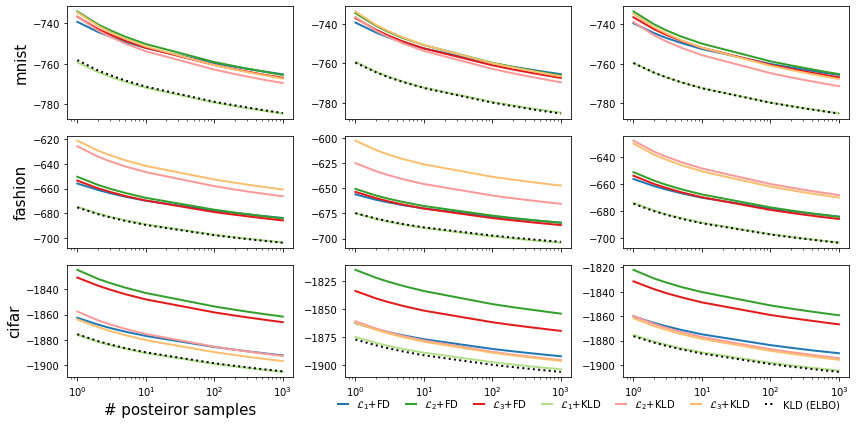

In [620]:
fig, axes = plt.subplots(3,3, figsize=(12,6), sharex=True)
for di, ds in enumerate(["mnist", "fashion", "cifar"]):
    for seed in range(3):
        iwelbo = np.load(f"results/ae/{ds}_iwelbo_{seed}.npz")["iwelbo"]
        ax = axes[di, seed]
        for i in range(7):
            ax.plot(np.cumsum(K_weights),-iwelbo[i], label=labels[i], color = colors[i], lw=2,
                   ls=":" if i == 6 else "-")
            ax.set_xscale("log")

    axes[di,0].set_ylabel(ds, fontsize=15)
axes[-1,0].set_xlabel("# posteiror samples", fontsize=15)
fig.tight_layout()
axes[-1,-1].legend(ncol=7, handlelength=1, columnspacing=1.5, loc="upper right", bbox_to_anchor=[1,-0.1], frameon=False)
plt.savefig("figs/ae_iwelbo.pdf", bbox_inches = "tight", pad_inches=0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


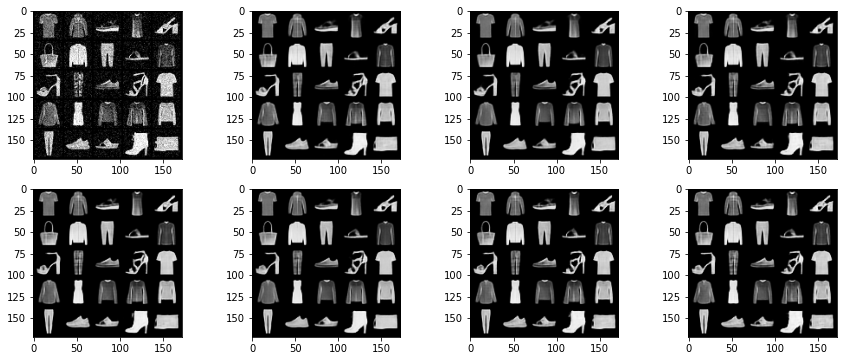

In [1090]:
def tensor_to_image(x):
    x = x[:25]
    x = np.transpose(make_grid(x.reshape(x.shape[0],nc,32,32), nrow=5).cpu().detach().numpy(), [1,2,0])
    return x

fig, axes = plt.subplots(2,4,figsize=(15,6))
axes = axes.reshape(-1)

ax = axes[0]
ax.imshow(tensor_to_image(x));

for ci, c in enumerate(all_conditions):
    d = dict(zip(condition_names, c))
    globals().update(d)

    
    nc = 3 if dataset == "cifar" else 1

    filename = f"{dataset}_smn{sm_noise_std}_sv{score_v}_dae{denoise_ae}_obj{objective}_M{M}_s{seed:02d}"
    
    model.load_state_dict(torch.load(f"results/ae/ckpts/"+filename)[0])
    z = model.prior.sample([100])
    z = model.encode(x).mean
    recon = model.decode(z).mean
    # recon = recon.reshape(bs, 1, 32,32)
    ax = axes[ci+1]
    ax.imshow(tensor_to_image(recon));   


    def gen():
        for i in range(10):
            z = model.prior.sample([100])
            pz_x = model.decode(z)
            yield pz_x.mean.detach().cpu().numpy().reshape(100,nc,32,32)

#     net = Metrics.LeNet5(dataset)
#     fid = Metrics.FID(net, test_data_loader, gen)
#     print(fid)

In [ ]:
def tensor_to_image(x):
    x = x[:25]
    x = np.transpose(make_grid(x.reshape(x.shape[0],nc,32,32), nrow=5).cpu().detach().numpy(), [1,2,0])
    return x

for ds, sd in tqdm.tqdm(list(product(["mnist"], np.arange(1)))):
    
    datasets= [[ds]]
    Ms = [[5,5 if ds=="cifar" else 1]]
    seeds = [[sd]]
    
    nc, test_dataset, test_data_loader = get_dataset(ds)
    model = AutoEncoder(Dz, Dh, Dx, nc = nc, fit_sigma=True, M = M).to(device=device)
    
    Dx = 32*32*nc

    all_conditions = [list(chain(*e)) for e in list(product(datasets, model_conditions, Ms, seeds))]

    noise_levels = np.linspace(0,0.5,11)
    errors = np.zeros((len(all_conditions), len(noise_levels)))

    for ci, c in enumerate(tqdm.tqdm(all_conditions), leave=False):
        d = dict(zip(condition_names, c))
        globals().update(d)
        if denoise_ae==1:
            continue
        nc = 3 if dataset == "cifar" else 1

        filename = f"{dataset}_smn{sm_noise_std}_sv{score_v}_dae{denoise_ae}_obj{objective}_M{M}_K{K}_s{seed:02d}"
        model.load_state_dict(torch.load(f"results/ae/ckpts/"+filename)[0])

        for ni, nstd in enumerate(tqdm.tqdm(noise_levels), leave=False):
            es = []
            for (clean_x, _) in test_data_loader:
                clean_x = clean_x.view(bs,-1).to(device)
                x = clean_x + torch.randn_like(clean_x) * nstd
                recon_x = model.decode(model.encode(x).mean).mean.detach()
                es += (recon_x-clean_x).square().mean().cpu().numpy(),
                errors[ci, ni] = np.mean(es)

In [471]:
np.savez(f"results/ae/{dataset}_noise_errors.npz", errors)

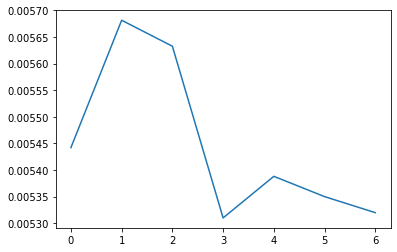

In [494]:
plt.plot(errors[:,1])

Text(0, 0.5, 'denoising error')

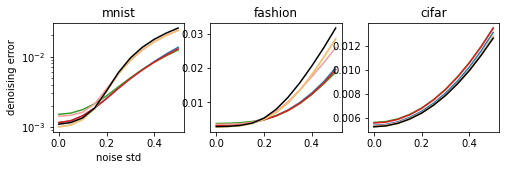

In [481]:
fig, axes = plt.subplots(1,3, figsize=(8,2), sharex=True, sharey=False)
datasets = ["mnist", "fashion", "cifar"]
for dataset, ax in zip(datasets, axes):
    errors = np.load(f"results/ae/{dataset}_noise_errors.npz")["arr_0"]
    for ci, c in enumerate(all_conditions):
        ax.plot(noise_levels, errors[ci], c=colors[ci],label=labels[ci])
    ax.set_title(dataset)
# ax.legend(frameon=False, labelspacing=0.1)
ax = axes[0]
ax.set_yscale("log")
ax.set_xlabel("noise std")
ax.set_ylabel("denoising error")
# fig.savefig(f"figs/noise_robust.pdf", bbox_inches="tight", pad_inches=0.1)

In [624]:
def get_dataset(name, partition="test", bs=200, num_worker=2):
    
    if name == "mnist":
        

        dataset = torchvision.datasets.MNIST(root='../data', train=partition=="train", 
                                                  transform=torchvision.transforms.Compose([
                                                                       torchvision.transforms.Pad(2), 
                                                                        transforms.ToTensor(),]), download=True)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=num_worker)
        nc = 1
    
    elif name == "fashion":
        

        dataset = torchvision.datasets.FashionMNIST(root='../data', train=partition=="train", 
                                                         transform=torchvision.transforms.Compose([
                                                                       torchvision.transforms.Pad(2), 
                                                                        transforms.ToTensor(),]), download=True)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=num_worker)
        nc = 1
        
        
    elif name == "cifar":
        
        dataset = torchvision.datasets.CIFAR10(root='../data', train=partition=="train", 
                                                         transform=torchvision.transforms.Compose([
                                                                       torchvision.transforms.Pad(0), 
                                                                        transforms.ToTensor(),]), download=True)
        data_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=num_worker)
        nc = 3
        
    return nc, dataset, data_loader

In [ ]:
def tensor_to_image(x):
    x = x[:30]
    x = np.transpose(make_grid(x.reshape(x.shape[0],nc,32,32), nrow=15).cpu().detach().numpy(), [1,2,0])
    return x


dn = "fashion"



datasets=[[dn]]
Ms = [[5,5 if dn == "cifar" else 1]]
seeds = [[1]]

d = dict(zip(condition_names, c))
globals().update(d)

all_conditions = [list(chain(*e)) for e in list(product(datasets, model_conditions, Ms, seeds))]


fig, axes = plt.subplots(4,2,figsize=(8,4))
axes = axes.reshape(-1)

nc, test_dataset, test_data_loader = get_dataset(dn)
Dx = 32*32*nc
model = AutoEncoder(Dz, Dh, Dx, nc = nc, fit_sigma=True, M = M).to(device=device)

for x, _ in test_data_loader:
    break
ax = axes[0]
ax.imshow(tensor_to_image(x));
ax.set_title("data")
ax.set_axis_off()

for ci, c in enumerate(all_conditions):
    d = dict(zip(condition_names, c))
    globals().update(d)



    filename = f"{dataset}_smn{sm_noise_std}_sv{score_v}_dae{denoise_ae}_obj{objective}_M{M}_K{K}_s{seed:02d}"
    
    model.load_state_dict(torch.load(f"results/ae/ckpts/"+filename)[0])
    z = model.prior.sample([100])
#     z = model.encode(x).mean
    recon = model.decode(z).mean
    # recon = recon.reshape(bs, 1, 32,32)
    ax = axes[ci+1]
    ax.imshow(tensor_to_image(recon));   
    ax.set_title(labels[ci])
    ax.set_axis_off()

    def gen():
        for i in range(10):
            z = model.prior.sample([100])
            pz_x = model.decode(z)
            yield pz_x.mean.detach().cpu().numpy().reshape(100,nc,32,32)

fig.tight_layout()
fig.savefig(f"figs/{dn}_ae_samples.jpeg", dpi=100, bbox_inches="tight", pad_inches=.1)
